In [2]:
# Imports
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import matplotlib_inline.backend_inline as backend_inline
from torchsummary import summary

backend_inline.set_matplotlib_formats("svg")


#### Pytorch device specific configuration ###

# # Pytorch Gpu Configuration for Cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pytorch Gpu Configuration for directml(AMD GPU)
# import torch_directml

# device = torch_directml.device()

# Set default device
torch.set_default_device(device)

In [ ]:
# Create Gaussian blurs with different widths
nGauss = 1000
imgSize = 91

x = np.linspace(-4, 4, imgSize)
X, Y = np.meshgrid(x, x)

# Initialize tensors containing images and labels
images = torch.zeros(nGauss, 1, imgSize, imgSize)
labels = torch.zeros(nGauss, 3)

for i in range(nGauss):
    # Location and width parameters
    loc = np.max(x) / 2 * np.random.randn(2)  # Center co-ordinate
    wid = np.random.rand() * 10 + 5  # width of the Gaussian

    # Create the Gaussian with random center
    G = np.exp(-((X - loc[0]) ** 2 + (Y - loc[1]) ** 2) / wid)
    G = G + np.random.randn(imgSize, imgSize) / 10

    # Add to the tensors
    images[i, :, :, :] = torch.Tensor(G).view(1, imgSize, imgSize)
    labels[i, :] = torch.Tensor([loc[0], loc[1], wid])

torch.Size([1000, 1, 91, 91])


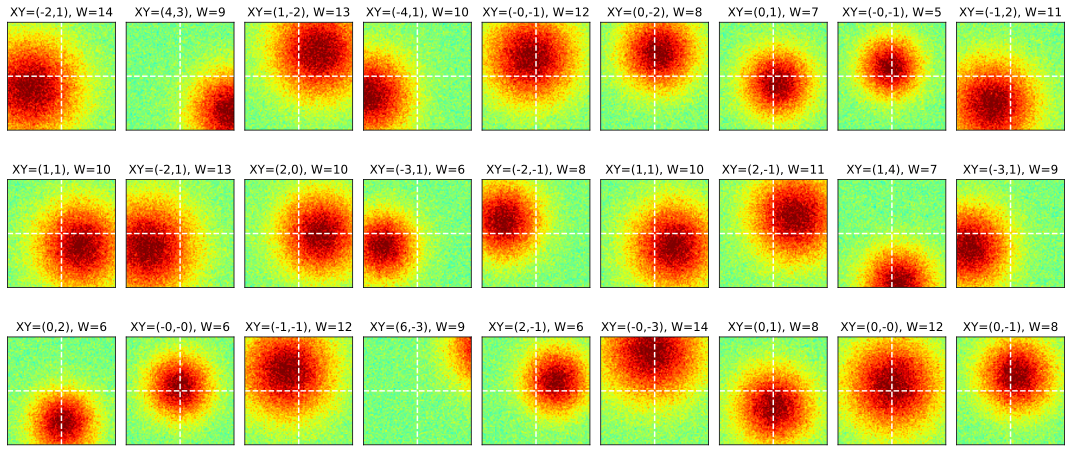

In [ ]:
# Visualize some image
fig, axs = plt.subplots(3, 9, figsize=(15, 7))

for i, ax in enumerate(axs.flatten()):
    whichPic = np.random.randint(nGauss)  # Find a random image
    G = np.squeeze(images[whichPic])
    ax.imshow(
        G.cpu(), vmin=-1, vmax=1, cmap="jet", extent=[-4, 4, -4, 4], origin="upper"
    )
    ax.set_title(
        f"XY=({labels[whichPic,0]:.0f},{labels[whichPic,1]:.0f}), W={labels[whichPic,2]:.0f}"
    )
    ax.plot([-4, 4], [0, 0], "w--")
    ax.plot([0, 0], [-4, 4], "w--")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()